<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-01 19:18:47.738949


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

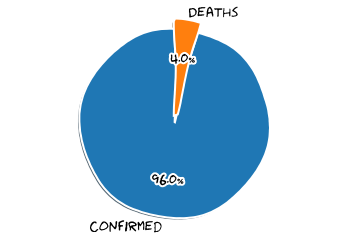

Alabama State Total Population
4887871
Alabama State Confirmed
7032 (0.14386631725755447% of population)
Alabama State Deaths
278 (3.9533560864618886% of confirmed)



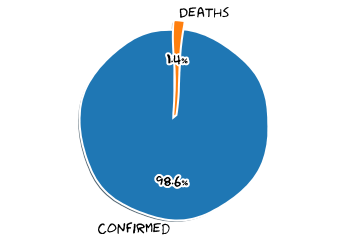

Alaska State Total Population
737438
Alaska State Confirmed
355 (0.04813964021382137% of population)
Alaska State Deaths
5 (1.4084507042253522% of confirmed)



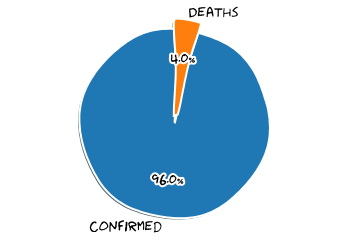

Arizona State Total Population
7171646
Arizona State Confirmed
7965 (0.1110623697823345% of population)
Arizona State Deaths
318 (3.992467043314501% of confirmed)



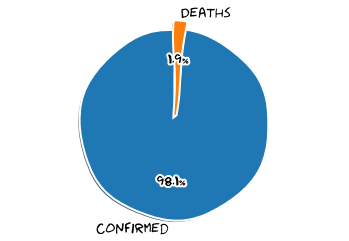

Arkansas State Total Population
3013825
Arkansas State Confirmed
3281 (0.10886498054797475% of population)
Arkansas State Deaths
61 (1.8591892715635476% of confirmed)



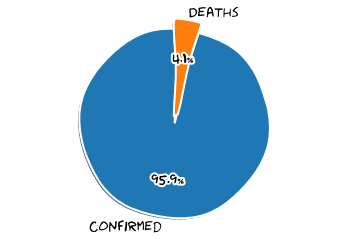

California State Total Population
39557045
California State Confirmed
50431 (0.1274893005784431% of population)
California State Deaths
2047 (4.059011322400904% of confirmed)



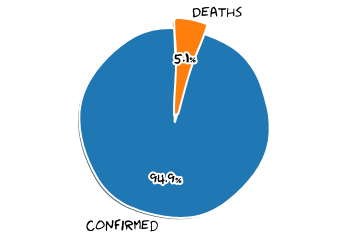

Colorado State Total Population
5695564
Colorado State Confirmed
15284 (0.26834919245925426% of population)
Colorado State Deaths
775 (5.070662130332374% of confirmed)



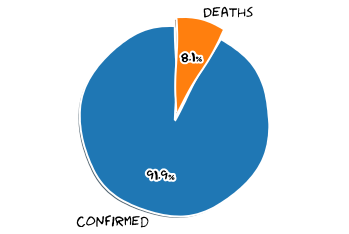

Connecticut State Total Population
3572665
Connecticut State Confirmed
27700 (0.7753315802069324% of population)
Connecticut State Deaths
2257 (8.148014440433213% of confirmed)



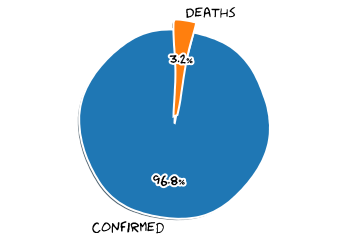

Delaware State Total Population
967171
Delaware State Confirmed
4734 (0.48946877025882707% of population)
Delaware State Deaths
152 (3.2108153781157585% of confirmed)



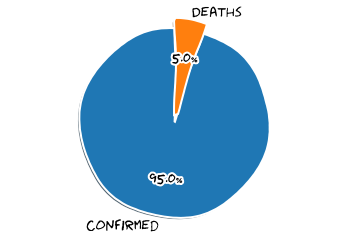

District of Columbia State Total Population
702455
District of Columbia State Confirmed
4658 (0.6631029745677659% of population)
District of Columbia State Deaths
231 (4.959209961356806% of confirmed)



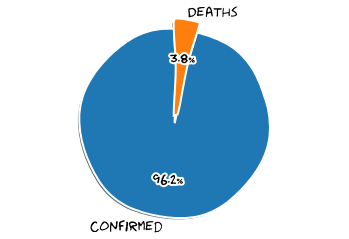

Florida State Total Population
21299325
Florida State Confirmed
34728 (0.16304742051684737% of population)
Florida State Deaths
1314 (3.783690393918452% of confirmed)



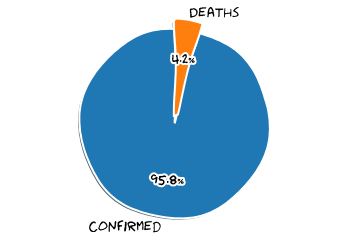

Georgia State Total Population
10519475
Georgia State Confirmed
27023 (0.2568854434275475% of population)
Georgia State Deaths
1141 (4.222329127039929% of confirmed)



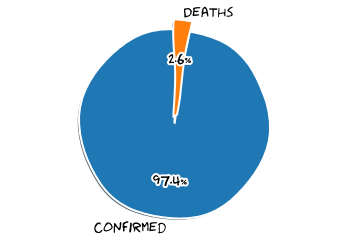

Hawaii State Total Population
1420491
Hawaii State Confirmed
618 (0.043506083459874084% of population)
Hawaii State Deaths
16 (2.5889967637540456% of confirmed)



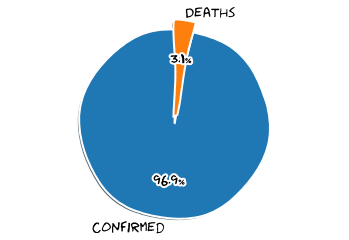

Idaho State Total Population
1754208
Idaho State Confirmed
2015 (0.1148666520731863% of population)
Idaho State Deaths
63 (3.1265508684863526% of confirmed)



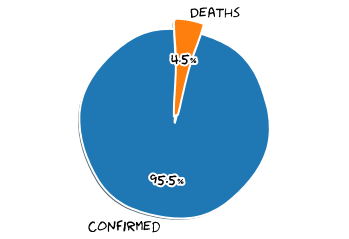

Illinois State Total Population
12741080
Illinois State Confirmed
52918 (0.4153337079745202% of population)
Illinois State Deaths
2355 (4.4502815677085295% of confirmed)



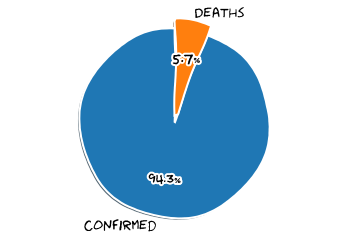

Indiana State Total Population
6691878
Indiana State Confirmed
18630 (0.27839718536410857% of population)
Indiana State Deaths
1062 (5.700483091787439% of confirmed)



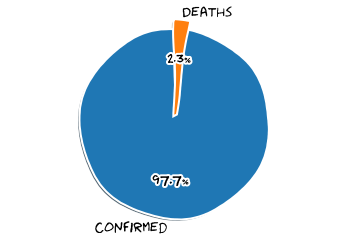

Iowa State Total Population
3156145
Iowa State Confirmed
7145 (0.22638376880656624% of population)
Iowa State Deaths
162 (2.2673198040587823% of confirmed)



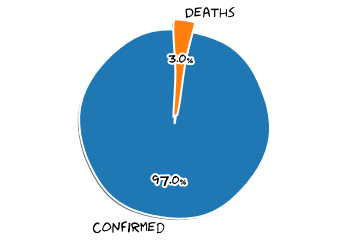

Kansas State Total Population
2911510
Kansas State Confirmed
4419 (0.15177691301077448% of population)
Kansas State Deaths
134 (3.032360262502829% of confirmed)



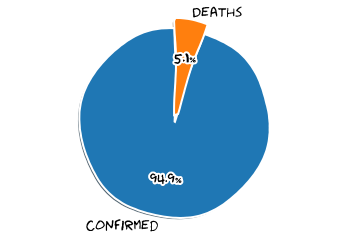

Kentucky State Total Population
4468402
Kentucky State Confirmed
4708 (0.10536205113147831% of population)
Kentucky State Deaths
239 (5.076465590484282% of confirmed)



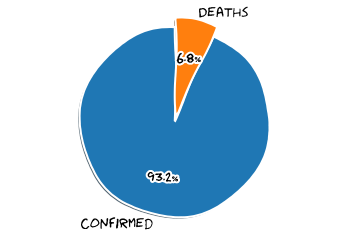

Louisiana State Total Population
4659978
Louisiana State Confirmed
28001 (0.6008826651112945% of population)
Louisiana State Deaths
1905 (6.803328452555266% of confirmed)



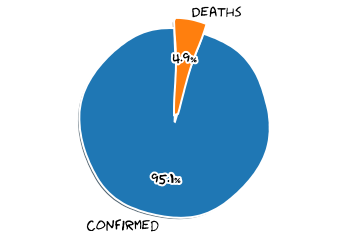

Maine State Total Population
1338404
Maine State Confirmed
1123 (0.08390590584009014% of population)
Maine State Deaths
55 (4.897595725734639% of confirmed)



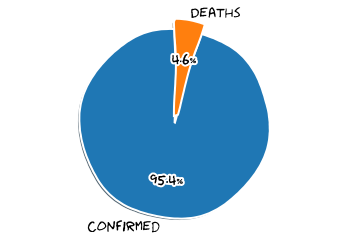

Maryland State Total Population
6042718
Maryland State Confirmed
23472 (0.3884344760089748% of population)
Maryland State Deaths
1080 (4.601226993865031% of confirmed)



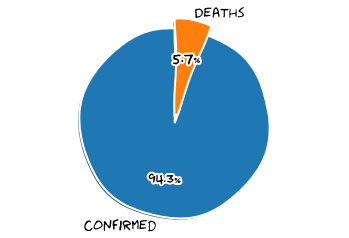

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
62205 (0.9012410482590277% of population)
Massachusetts State Deaths
3562 (5.726227795193313% of confirmed)



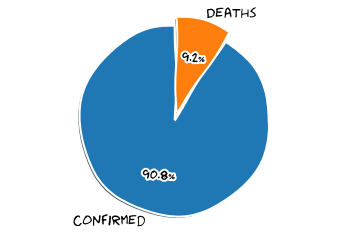

Michigan State Total Population
9995915
Michigan State Confirmed
41379 (0.4139591022932868% of population)
Michigan State Deaths
3789 (9.156818676140071% of confirmed)



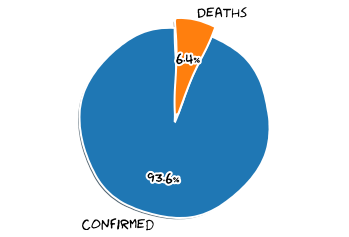

Minnesota State Total Population
5611179
Minnesota State Confirmed
5729 (0.10209975479306577% of population)
Minnesota State Deaths
369 (6.440914644789666% of confirmed)



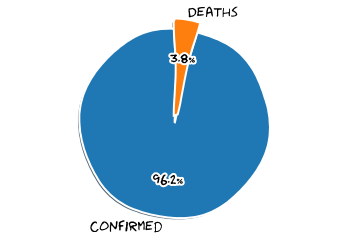

Mississippi State Total Population
2986530
Mississippi State Confirmed
6868 (0.2299658801351401% of population)
Mississippi State Deaths
263 (3.829353523587653% of confirmed)



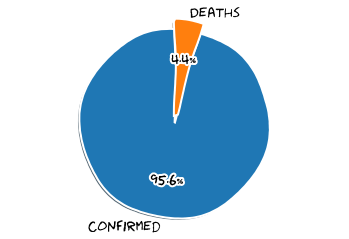

Missouri State Total Population
6126452
Missouri State Confirmed
7955 (0.1298467693862614% of population)
Missouri State Deaths
351 (4.412319296040226% of confirmed)



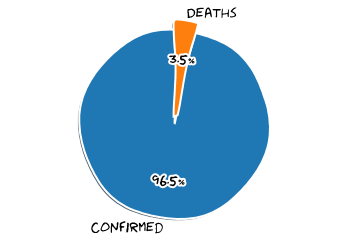

Montana State Total Population
1062305
Montana State Confirmed
453 (0.04264312038444703% of population)
Montana State Deaths
16 (3.532008830022075% of confirmed)



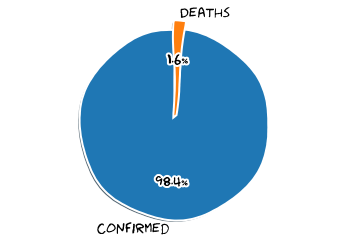

Nebraska State Total Population
1929268
Nebraska State Confirmed
4281 (0.22189763164060153% of population)
Nebraska State Deaths
70 (1.6351319785096938% of confirmed)



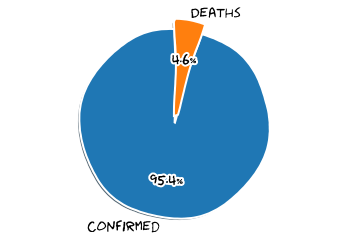

Nevada State Total Population
3034392
Nevada State Confirmed
5227 (0.17225856118787553% of population)
Nevada State Deaths
243 (4.64893820547159% of confirmed)



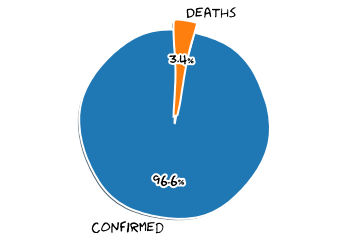

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
2146 (0.1582061516095596% of population)
New Hampshire State Deaths
72 (3.3550792171481825% of confirmed)



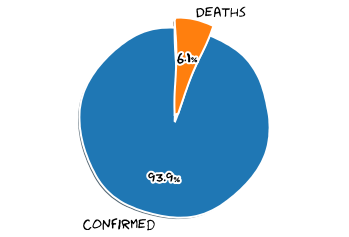

New Jersey State Total Population
8908520
New Jersey State Confirmed
118652 (1.3318935131761505% of population)
New Jersey State Deaths
7228 (6.091764150625358% of confirmed)



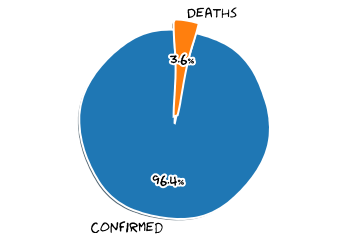

New Mexico State Total Population
2095428
New Mexico State Confirmed
3411 (0.16278297321597304% of population)
New Mexico State Deaths
123 (3.6059806508355323% of confirmed)



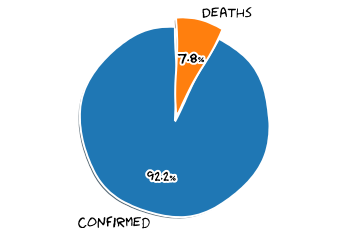

New York State Total Population
19542209
New York State Confirmed
308314 (1.5776824411201416% of population)
New York State Deaths
23917 (7.757351271755418% of confirmed)



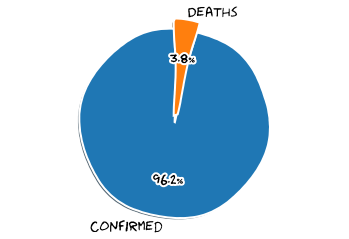

North Carolina State Total Population
10383620
North Carolina State Confirmed
11005 (0.10598423285906071% of population)
North Carolina State Deaths
414 (3.761926397092231% of confirmed)



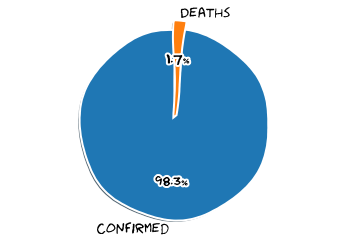

North Dakota State Total Population
760077
North Dakota State Confirmed
1107 (0.14564313878725443% of population)
North Dakota State Deaths
19 (1.7163504968383017% of confirmed)



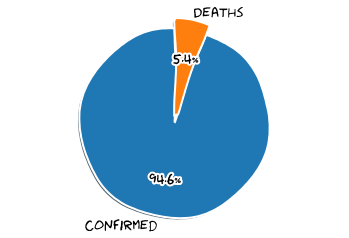

Ohio State Total Population
11689442
Ohio State Confirmed
18027 (0.15421608661901912% of population)
Ohio State Deaths
976 (5.414101070616298% of confirmed)



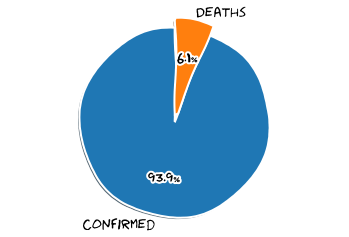

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
3749 (0.09507798347433567% of population)
Oklahoma State Deaths
230 (6.134969325153374% of confirmed)



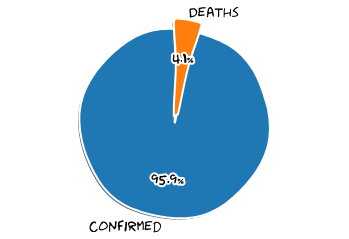

Oregon State Total Population
4190713
Oregon State Confirmed
2510 (0.059894342561755% of population)
Oregon State Deaths
103 (4.103585657370518% of confirmed)



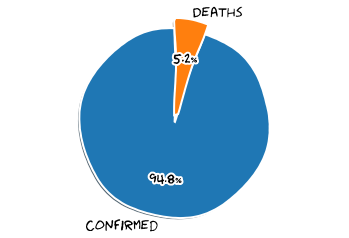

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
48911 (0.3819065421728328% of population)
Pennsylvania State Deaths
2535 (5.182883196009078% of confirmed)



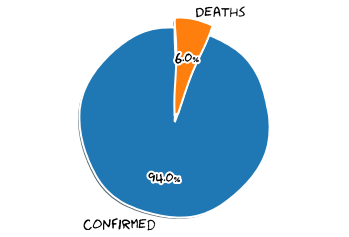

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
1575 (0.04929341411819716% of population)
Puerto Rico State Deaths
94 (5.968253968253968% of confirmed)



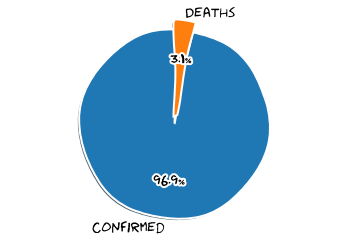

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
8962 (0.8476187323550692% of population)
Rhode Island State Deaths
279 (3.1131443874135236% of confirmed)



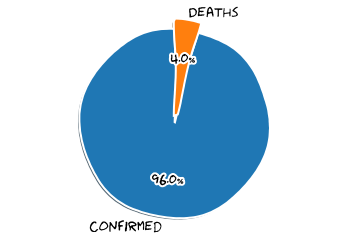

South Carolina State Total Population
5084127
South Carolina State Confirmed
6095 (0.11988292188609764% of population)
South Carolina State Deaths
244 (4.003281378178835% of confirmed)



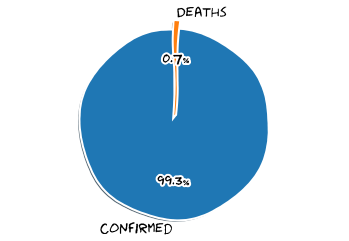

South Dakota State Total Population
882235
South Dakota State Confirmed
2449 (0.2775904379218689% of population)
South Dakota State Deaths
17 (0.6941608819926501% of confirmed)



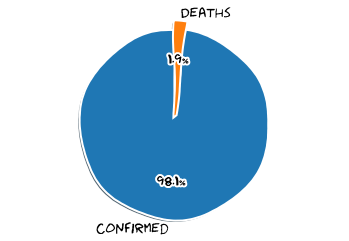

Tennessee State Total Population
6770010
Tennessee State Confirmed
10735 (0.158566974051737% of population)
Tennessee State Deaths
199 (1.8537494177922682% of confirmed)



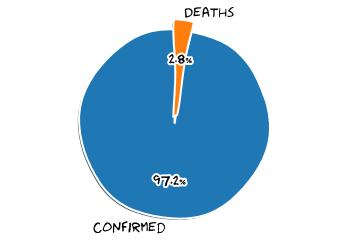

Texas State Total Population
28701845
Texas State Confirmed
28675 (0.09990646942731382% of population)
Texas State Deaths
812 (2.831734960767219% of confirmed)



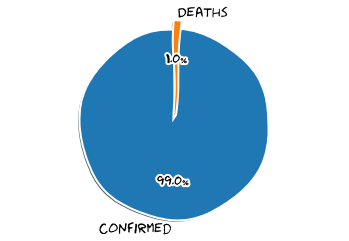

Utah State Total Population
3161105
Utah State Confirmed
4672 (0.14779641929009002% of population)
Utah State Deaths
46 (0.9845890410958904% of confirmed)



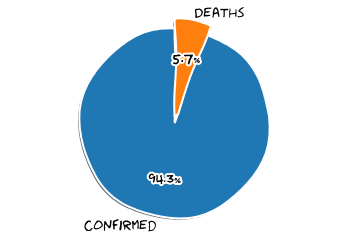

Vermont State Total Population
626299
Vermont State Confirmed
879 (0.14034830009308652% of population)
Vermont State Deaths
50 (5.688282138794084% of confirmed)



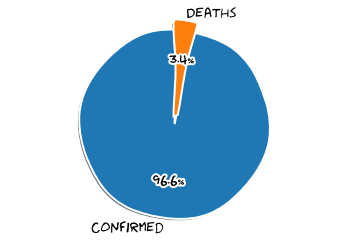

Virginia State Total Population
8517685
Virginia State Confirmed
16905 (0.1984694198012723% of population)
Virginia State Deaths
580 (3.430937592428276% of confirmed)



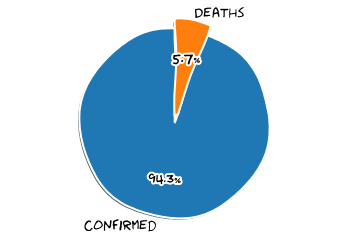

Washington State Total Population
7535591
Washington State Confirmed
14327 (0.1901244374860578% of population)
Washington State Deaths
814 (5.681580233126264% of confirmed)



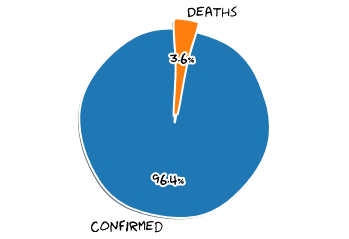

West Virginia State Total Population
1805832
West Virginia State Confirmed
1125 (0.06229815398110123% of population)
West Virginia State Deaths
41 (3.644444444444445% of confirmed)



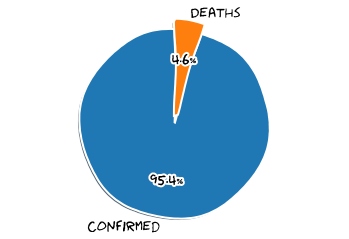

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
6907 (0.11880827746402897% of population)
Wisconsin State Deaths
317 (4.589546836542638% of confirmed)



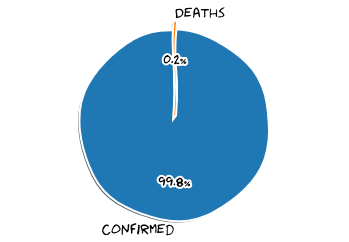

Wyoming State Total Population
577737
Wyoming State Confirmed
559 (0.09675682879926334% of population)
Wyoming State Deaths
1 (0.17889087656529518% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1082411
US Deaths
63438

New York City Confirmed
169690
New York City Deaths
18399

Philippines Confirmed
8772
Philippines Deaths
579



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 3305595},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 235861},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-01T17:32:29.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1040163},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey
0,45001,Abbeville,South Carolina,US,2020-05-01 02:32:28,34.22333378,-82.46170658,31,0,0,31,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-05-01 02:32:28,30.295064899999996,-92.41419698,130,10,0,120,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-05-01 02:32:28,37.76707161,-75.63234615,264,4,0,260,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-05-01 02:32:28,43.4526575,-116.24155159999998,671,16,0,655,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-05-01 02:32:28,41.33075609,-94.47105874,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3172,,,,West Bank and Gaza,2020-05-01 02:32:28,31.9522,35.2332,344,2,76,266,West Bank and Gaza
3173,,,,Western Sahara,2020-05-01 02:32:28,24.2155,-12.8858,6,0,5,1,Western Sahara
3174,,,,Yemen,2020-05-01 02:32:28,15.552726999999999,48.516388,6,2,1,3,Yemen
3175,,,,Zambia,2020-05-01 02:32:28,-13.133897,27.849332,106,3,55,48,Zambia


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588354349000,40.767273,-73.971526,169690,0,18399,151291,New York City,36061,"New York City, New York, US",2035.429109,None,None,84036061,USA
1,Illinois,US,1588354349000,41.841448,-87.816588,36513,0,1607,34906,Cook,17031,"Cook, Illinois, US",708.958216,None,None,84017031,USA
2,New York,US,1588354349000,40.740665,-73.589419,36161,0,1700,34461,Nassau,36059,"Nassau, New York, US",2664.924491,None,None,84036059,USA
3,New York,US,1588354349000,40.883201,-72.801217,34037,0,1177,32860,Suffolk,36103,"Suffolk, New York, US",2305.091220,None,None,84036103,USA
4,New York,US,1588354349000,41.162784,-73.757417,29232,0,1031,28201,Westchester,36119,"Westchester, New York, US",3021.376612,None,None,84036119,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,Missouri,US,1588354349000,40.479456,-94.423288,1,0,0,1,Worth,29227,"Worth, Missouri, US",49.677099,None,None,84029227,USA
2848,West Virginia,US,1588354349000,37.612327,-81.545111,1,0,0,1,Wyoming,54109,"Wyoming, West Virginia, US",4.903403,None,None,84054109,USA
2849,Texas,US,1588354349000,33.173202,-102.827643,1,0,0,1,Yoakum,48501,"Yoakum, Texas, US",11.477103,None,None,84048501,USA
2850,Alaska,US,1588354349000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588354349000,40.767273,-73.971526,169690,0,18399,151291,New York City,36061,"New York City, New York, US",2035.429109,None,None,84036061,USA
2,New York,US,1588354349000,40.740665,-73.589419,36161,0,1700,34461,Nassau,36059,"Nassau, New York, US",2664.924491,None,None,84036059,USA
3,New York,US,1588354349000,40.883201,-72.801217,34037,0,1177,32860,Suffolk,36103,"Suffolk, New York, US",2305.091220,None,None,84036103,USA
4,New York,US,1588354349000,41.162784,-73.757417,29232,0,1031,28201,Westchester,36119,"Westchester, New York, US",3021.376612,None,None,84036119,USA
16,New York,US,1588354349000,41.150279,-74.025605,11812,0,511,11301,Rockland,36087,"Rockland, New York, US",3625.659553,None,None,84036087,USA
19,New York,US,1588354349000,41.403375,-74.302408,8751,0,320,8431,Orange,36071,"Orange, New York, US",2273.341300,None,None,84036071,USA
54,New York,US,1588354349000,42.762490,-78.730637,3481,0,266,3215,Erie,36029,"Erie, New York, US",378.904150,None,None,84036029,USA
61,New York,US,1588354349000,41.764861,-73.743567,3002,0,37,2965,Dutchess,36027,"Dutchess, New York, US",1020.331863,None,None,84036027,USA
109,New York,US,1588354349000,43.146389,-77.693229,1478,0,115,1363,Monroe,36055,"Monroe, New York, US",199.253138,None,None,84036055,USA
119,New York,US,1588354349000,41.890279,-74.262521,1298,0,30,1268,Ulster,36111,"Ulster, New York, US",730.966983,None,None,84036111,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

308314

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588354349000,40.767273,-73.971526,169690,0,18399,151291,New York City,36061,"New York City, New York, US",2035.429109,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
58,None,Philippines,1588354349000,12.879721,121.774017,8772,1084,579,7109,None,None,Philippines,8.005031,None,None,608,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
